# Python Decision Tree

Install Andaconda 3. Anaconda 3 come with Python 3. 
Check version command 
> conda list

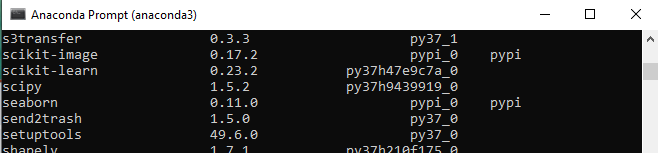

You should have scikit-learn 0.23.2.

Update the newest version with command:
> conda update --all 
If you just want to update scikit-leanr
> conda install scikit-learn=0.23.2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# Draw classificaiton Tree
from sklearn.tree import plot_tree
# to split data into training and testing dataset 
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score # for cross validaiton
from sklearn.metrics import confusion_matrix # Create COnfusion Matrix
from sklearn.metrics import plot_confusion_matrix# to drwa a confusion matrix.

# Import the Data
We can data from UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/heart+disease

The file: "heart.disese.names" contains the data set decripiotn:
        
We use the Heart Disease Dataset.

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Dowload "processed.cleveland.data" and save to your local folder 
"../uci_data/processed.cleveland.data"
    
This dataset allow us to predict heart disease bsae don sex, age, blood presurre ad a varirety 
of other metrics.

In [3]:
df = pd.read_csv ('../uci_data/processed.cleveland.data', 
                  header=None)

# You can use the following 
# df = pd.read_csv(
# 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
# header=None)
df.head()
# There are 14 columns names from 0 to 13 which are described in the "heart.disease.names" file.

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0

# Column data and Explanation:
In the 'heart.disease.names' file column: 7. Attribute Information:

-- Only 14 used

  -- 1. #3  (age)       

  -- 2. #4  (sex)      

  -- 3. #9  (cp): chest pain type

    -- Value 1: typical angina

    -- Value 2: atypical angina

    -- Value 3: non-anginal pain

    -- Value 4: asymptomatic        

  -- 4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital)  

  -- 5. #12 (chol): serum cholestoral in mg/dl      

  -- 6. #16 (fbs): (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)        

  -- 7. #19 (restecg): resting electrocardiographic results  

    -- Value 0: normal

    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                elevation or depression of > 0.05 mV)

    -- Value 2: showing probable or definite left ventricular hypertrophy
                by Estes' criteria   

  -- 8. #32 (thalach): maximum heart rate achieved  

  -- 9. #38 (exang): exercise induced angina (1 = yes; 0 = no)

  -- 10. #40 (oldpeak) = ST depression induced by exercise relative to rest 

  -- 11. #41 (slope): the slope of the peak exercise ST segment

    -- Value 1: upsloping

    -- Value 2: flat

    -- Value 3: downsloping     

  -- 12. #44 (ca): number of major vessels (0-3) colored by flourosopy   

  -- 13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 

  -- 14. #58 (num): diagnosis of heart disease (angiographic disease status)

    -- Value 0: < 50% diameter narrowing

    -- Value 1: > 50% diameter narrowing

    (in any major vessel: attributes 59 through 68 are vessels) 

In [4]:
## change the columns numbers to column names
df.columns = ['age', 'sex', 'cp', 'resbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'hd']
df.head()

age  sex   cp  resbp   chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  63.0  1.0  1.0  145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0   
1  67.0  1.0  4.0  160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0   
2  67.0  1.0  4.0  120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0   
3  37.0  1.0  3.0  130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0   
4  41.0  0.0  2.0  130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0   

    ca thal  hd  
0  0.0  6.0   0  
1  3.0  3.0   2  
2  2.0  7.0   1  
3  0.0  3.0   0  
4  0.0  3.0   0

# MIssing Data include two parts: 
## Part 1: Identify missing data, Part 2: Fix missing Data

# Missing Data: 
## Part 1: Identify Missing Data

One of the the biggest part in the data analysis project is to make sure the data is correctly format.

We need to fix the incorrect data format.

The first part the missing Data.

Missing Data is either blank, NA, or ???.

There are two major ways to fix missing data.

1. Remove the data.

2. Impute the value. We can use duplicate the previous rows, insert the average data, 
use correlation to find data, and etc.

In [19]:
## dtypes tell us the "data type" for arch column,
df.dtypes

age        float64
sex        float64
cp         float64
resbp      float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

# Note: Data Type Object: ca and thal

Normally, object data type are huge data object inside.
We need to investigate data object.

In [20]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

# Note: Data Object: ca

We see ca contains numbers (0.0, 3.0, 2.90, and 1.0) and question mark (?). 

The number represents the number of blood vessels that we lit up by fluoroscopy 
and the question mark represent missing data.

Now, we look at unique values for thal.

In [22]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

# Note: Data Object: Thal

Again, we see the thal contains a mixture of numbers, representing different diagnoses from the 
thallium (radioactive element) heart scan, and question mark represent the missing value.

Now, we have identified some missing values

# Part 2: Fix Missing Data:

Since scikit-learn classification trees do not support datasets with missing values, we need to fix question marks.

We can delete these patterns from training dataset, or impute values for the missing data.

First, let see how many rows contain missing values.

In [24]:
## Print the number of rows that contains missing data.
## loc[], sort for "location".
## len() , short for "length". 
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [5]:
# Print the row local of missing value
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

age  sex   cp  resbp   chol  fbs  restecg  thalach  exang  oldpeak  \
87   53.0  0.0  3.0  128.0  216.0  0.0      2.0    115.0    0.0      0.0   
166  52.0  1.0  3.0  138.0  223.0  0.0      0.0    169.0    0.0      0.0   
192  43.0  1.0  4.0  132.0  247.0  1.0      2.0    143.0    1.0      0.1   
266  52.0  1.0  4.0  128.0  204.0  1.0      0.0    156.0    1.0      1.0   
287  58.0  1.0  2.0  125.0  220.0  0.0      0.0    144.0    0.0      0.4   
302  38.0  1.0  3.0  138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  hd  
87     1.0  0.0    ?   0  
166    1.0    ?  3.0   0  
192    2.0    ?  7.0   1  
266    2.0  0.0    ?   2  
287    2.0    ?  7.0   0  
302    1.0    ?  3.0   0

In [26]:
len(df)

303

# Note:

We have 6 rows out of 303 rows, or 2%, contains missing values. Since 303 -6 = 297.

207 is plenty of data to build a classification tree. We will remove the rows.

# Note:

Impute missing values is a big topics. We do not do it here.

We want to focus on Decision Tree. 

Delete the missing rows is the easiest way.

In [8]:
## Use loc{} to select all rows do not contain missing values
# and save them in a new dataframe called "df_no_missing"
# The len(df_no_missing) = 303 -6 = 297.
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
len(df_no_missing)

297

In [30]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [31]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

# Split Data into Features and Target

We fix the missing data.

Now, we want the format the data for classification tree.

We need to split data into Model classification and prediction.

1. Feature (X): The dataset for Model classification.

2. Target (y): the dataset for Prediction.

In [9]:
X = df_no_missing.drop ('hd', axis=1).copy()   
# Shallow copy to X. Padans uses copy by reference.
# copy() ensure that orginal data df_no_missing is not modified when we modify X or y.
# Alternatively, we can use 
# X = df_no_missing.iloc[:, :-1]
# This copy from all row, and loop from first column to last second column (before -1).
X.head()

age  sex   cp  resbp   chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  63.0  1.0  1.0  145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0   
1  67.0  1.0  4.0  160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0   
2  67.0  1.0  4.0  120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0   
3  37.0  1.0  3.0  130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0   
4  41.0  0.0  2.0  130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0   

    ca thal  
0  0.0  6.0  
1  3.0  3.0  
2  2.0  7.0  
3  0.0  3.0  
4  0.0  3.0

In [10]:
## Copy last column daya to y
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# Format Data Part:
## One-Hot Encoding

Look at the Features:
- age: Float
- sex: Category: 
   - 0: female, 
   - 1: male
- cp: chest pain, Category: 
   - 1: typical angina (server pain),
   - 2: atypical angina, 
   - 3: non-anginal pain, 
   - 4: asymptomatic (no symptom)       
- trestbps: resting blood pressure (in mm Hg on admission to the hospital), float
- chol: serum cholestoral in mg/dl, float
- fbs: (fasting blood sugar > 120 mg/dl), Category: 
    - 0: > 120 mg/dl, 
    - 1: <= 120 mg/dl,
- restecg: resting electrocardiographic results, Category: 
  - 1: normal, 
  - 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 3: showing probable or definite left ventricular hypertrophy by Estes' criteria   
- thalach: maximum heart rate achieved, float
- exang : exercise induced angina, Category: 1 = yes, 0 = no)
- oldpeak: ST depression induced by exercise relative to rest, float
- slope: the slope of the peak exercise ST segment, Category
  - 1: upsloping
  - 2: flat
  - 3: downsloping     
- ca: number of major vessels (0-3) colored by flourosopy, float
- thal: Category: 3 = normal; 6 = fixed defect; 7 = reversable defect
- num: diagnosis of heart disease (angiographic disease status), Category
  - 0: < 50% diameter narrowing
  - 1: > 50% diameter narrowing

In [35]:
X.dtypes

age        float64
sex        float64
cp         float64
resbp      float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

# Note:

We can see age, resbp, chol, and thalach are all float64, which is good,

However, sex, cp, ca, thal, should be category. 

We need to convert them into correct data type for scikit-learn Decision Tree.

The categorical data are converted into multiple column (in binary format), called **One-Hot Encoding**.

For example, cp (chest pain) has four categories. The scikit-learn will clustering the categories.

We need to convert them into category type for scikit-learn.

    1. typical angina (server pain)
    2. atypical angina
    3. non-anginal pain
    4. asymptomatic (no symptom)

In [37]:
X['cp'].unique()

array([1., 4., 3., 2.])

# Note:

'cp' should be converted from float into categories with One-Hot Encoding (with binary format 0s and 1s).

There are many ways to convert to **One-Hot Encoding**.

Two of most popular methods are ColumnTransformer() (from scikit-learn) and
get_dummies() (from Pandas).

ColumnTransformer() creates a persistent function that can validate data you get in the future.

ColumnTransformer() is used in production version.

For example, if you build your Decision Tree using a categorical variables **favorite color** 
that has **red, blue,** and **green** options, then ColumnTransformer() can remember those options 
and later on when your Decision Tree. 

We use get_dummies() to convert data into **One-Hot Encoding**.

get_dummies() is easy for experiment.

We need to get used to both ColumnTransformer() and get_dummies().

In [11]:
## Convert into One-Hot Encoding
pd.get_dummies(X, columns=['cp']).head()

age  sex  resbp   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  \
0  63.0  1.0  145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0  0.0   
1  67.0  1.0  160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0  3.0   
2  67.0  1.0  120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0  2.0   
3  37.0  1.0  130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0  0.0   
4  41.0  0.0  130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0  0.0   

  thal  cp_1.0  cp_2.0  cp_3.0  cp_4.0  
0  6.0       1       0       0       0  
1  3.0       0       0       0       1  
2  7.0       0       0       0       1  
3  3.0       0       0       1       0  
4  3.0       0       1       0       0

In [12]:
# We convert four columns and save in X_encoded.
X_encoded = pd.get_dummies (X, columns = ['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

age  sex  resbp   chol  fbs  thalach  exang  oldpeak   ca  cp_1.0  ...  \
0  63.0  1.0  145.0  233.0  1.0    150.0    0.0      2.3  0.0       1  ...   
1  67.0  1.0  160.0  286.0  0.0    108.0    1.0      1.5  3.0       0  ...   
2  67.0  1.0  120.0  229.0  0.0    129.0    1.0      2.6  2.0       0  ...   
3  37.0  1.0  130.0  250.0  0.0    187.0    0.0      3.5  0.0       0  ...   
4  41.0  0.0  130.0  204.0  0.0    172.0    0.0      1.4  0.0       0  ...   

   cp_4.0  restecg_0.0  restecg_1.0  restecg_2.0  slope_1.0  slope_2.0  \
0       0            0            0            1          0          0   
1       1            0            0            1          0          1   
2       1            0            0            1          0          1   
3       0            1            0            0          0          0   
4       0            0            0            1          1          0   

   slope_3.0  thal_3.0  thal_6.0  thal_7.0  
0          1         0         1         0  
1          0         1         0         0  
2          0         0         0         1  
3          1         1         0         0  
4          0         1         0         0  

[5 rows x 22 columns]

# Convert Categories into 0s and 1s.

We convert the Categories (0, 1, 2, 3, 4) into (0, 1)

In [40]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [13]:
# Convert 0, 1, 2, 3, 4 into 0, 1
# In this discussion, we only predict 0 and 1 (for Yes/No for heart disease)
# If we have more target levels, then we need to convert it by get_dummies()or ColumnTransformer() 
y_not_zero_index = y > 0 # get the index for each non-zero index.
y[y_not_zero_index] = 1# set each non-zero value in y to 1.
y.unique()

array([0, 1], dtype=int64)

# Build a Preliminary Classification Tree

This is a preliminary. 

We will optimize the preliminary tree and get the optimized tree later.

In [14]:
## Split all data into Training and Testing Dataset
## random_state: Pass an int, e.g., 42, for reproducible output.
# default split ratio is 70:30.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

## Create a decision Tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

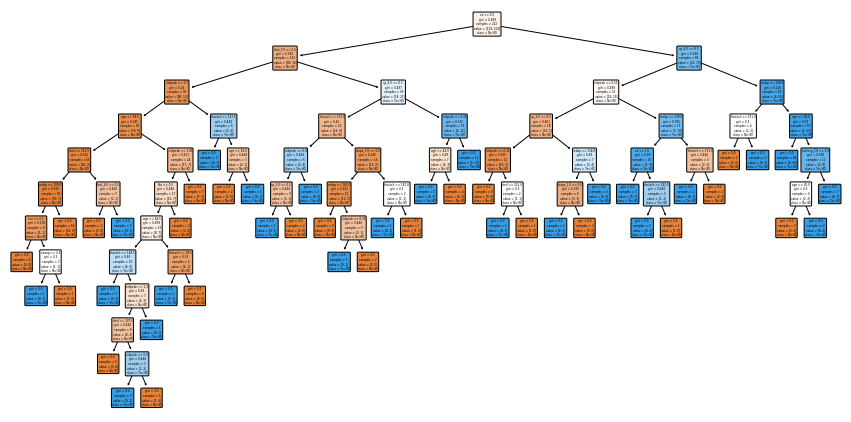

In [46]:
## Plot the Tree
plt.figure(figsize=(15, 7.5))
# plot_tree is a scikit-learn function.
# this is a master decision tree, very huge.
# AFter optimize pruning, the tree can be much smaller.
# We need the prelimary tree and then confusion matrix and then improve the prediction.
# scikit-learn is fo huge dataset and suitable for production.
plot_tree (clf_dt, filled=True, rounded = True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns);
plt.show()

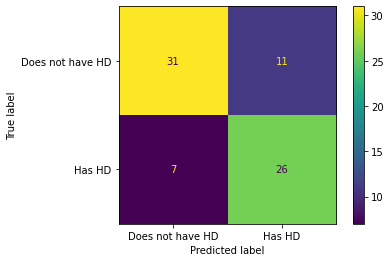

In [15]:
# Plot Confusion Matrix:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

# Note:

We see 31 + 11 =42 people do not have Heart Disease.

31 (74%) are correctly predicted. 

7 + 26 = 33 that have Heart Disease. 26 (79%) are correctly classified. 

Can we do better?

The classification Tree is too huge and is overfit the training dataset.

We need to prune the tree and solve the overfitting problem and give better result.

# Cost Complexity Pruning:
## Part 1: Visualize Alpha

Decision Trees are notorious for being overfit to the Training Dataset.

There are a lot of parameters, such as, max_depth and min_samples, 
that are designing to reduce overfitting, however, pruning a tree with 
Cost Complexity Pruning can simplify the whole process of finding a 
smaller tree that improves the accuracy with the Testing Dataset.

Pruning a decision tree is all about finding the right value for the pruning 
parameter, alpha. We plot different values of alpha vs. sum of squared residuals
to get the optimal value of alpha.

First, we extract the different values of alpha that are available for this trees and
build a pruned tree for each value of alpha.

Note:
    
We omit the maximum value for alpha with ccp_alphas = cc-_alpha[:-1]
because it will prune all leaves, leaving us with only a root instead of a tree.

In [16]:
# Determine values for alpha
path = clf_dt.cost_complexity_pruning_path (X_train, y_train)
# Extract different values for alpha
ccp_alphas = path.ccp_alphas
# Exclude the maximum value for alpha
ccp_alpha = ccp_alphas[:-1]

# Create an array that we will put decision trees into
clf_dts = []

# Now, create one decision tree per value for alpha 
# and store it in the array.
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit (X_train, y_train)
    clf_dts.append(clf_dt)

# Plot the Graph
Plot the graph the accuracy of the tree for Training Dataset and Testing Dataset.

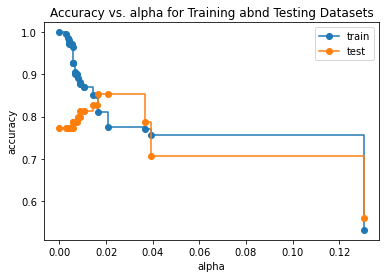

In [17]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs. alpha for Training abnd Testing Datasets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()


# Note: 
Blue is accuracy for training dataset.

orange is accuracy for testing dataset.

We have alpha = 0..016 is the best value.

# Cost Complexity Pruning Part 2: Cross-Validation

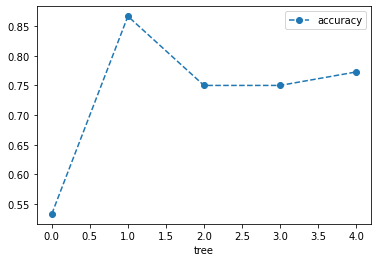

In [18]:
# Create the tree with ccp_alpha = 0.016
# We use the same alpha for Cross-Validation.
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha= 0.016)

## Now, we use 5-fold corss-validation to create 5 different training and testing dataset
# that are then used to trainf and test the tree.
# Note: We use 5-fold because we do not have tons of data for 10-fold cross validation.
scores = cross_val_score (clf_dt, X_train, y_train, cv = 5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot (x='tree', y='accuracy', marker='o', linestyle='--')
plt.show()

# Cross-Validation with different Initial Alpha Values

The graph above shows that using different training and testing data with same alpha 
results in different accuracies. The alpha was = 0.016.

However, the alpha is sensitive to the datasets.

Instead of alpha = 0.016, picking a single Training Dataset, and single Testing Dataset, 
we use different alpha and different datasets for Cross-Validation 
to find the optimal value for ccp_alpha.

<AxesSubplot:xlabel='alpha'>

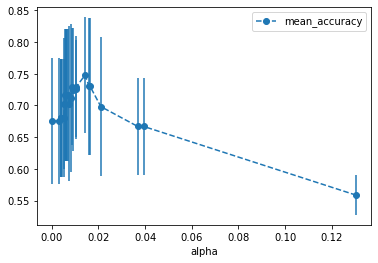

In [31]:
# Create an array to store the result of each fold during cross validaiton
alpha_loop_values = []

# For each candidate value for alpha, we run 5-fold coss-validation
# Then, we store the mean and standard deviation of th scores (The accuracy)
# for each call to cross_val_score in alpha_loop_values.
#print('ccp_alphas:', ccp_alphas)
for ccp_alpha in ccp_alphas:
    #print('ccp_alpha:', ccp_alpha)
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    #print('X_train.head:', X_train.head())
    #print('y_train.head:', y_train.head())
    #print('clf_dt:', clf_dt)
    scores = cross_val_score (clf_dt, X_train, y_train, cv=5)
    #print('scores:', scores)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can draw a graph of the means and stadard deviations of the scores
# for each candaite value for alpha
alpha_results = pd.DataFrame (alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', 
                   linestyle='--')


# Find Optimal Alpha Value Which Better Than 0.016
    
We have alpha = 0.016 which we used previously. 

Now, we got better alpha = 0.014 for better accuracy of overall validation.

Instead of alpha = 0.016, we can have alpha = 0.014 (or closer) for the optimal alpha.

In [64]:
print ("alpha_results[15:25]:")
print(alpha_results[15:25])
print('find optimal alpha:')
alpha_results[(alpha_results['alpha'] > 0.014)
              &
              (alpha_results['alpha'] < 0.015)]

alpha_results[15:25]:
       alpha  mean_accuracy       std
15  0.008115       0.711717  0.116351
16  0.008687       0.729495  0.091974
17  0.008899       0.725051  0.097426
18  0.010382       0.725253  0.078664
19  0.010578       0.729798  0.079304
20  0.014225       0.747778  0.091395
21  0.016041       0.730000  0.108218
22  0.016425       0.730000  0.108218
23  0.021031       0.698182  0.109584
24  0.036800       0.666970  0.076526
find optimal alpha:


alpha  mean_accuracy       std
20  0.014225       0.747778  0.091395

# Store Optimal alpha Result

Now, we store the best alpha result.

In [80]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
              &
              (alpha_results['alpha'] < 0.015)]['alpha']
print('ideal_ccp_alpha:')
print(ideal_ccp_alpha)

ideal_ccp_alpha:
20    0.014225
Name: alpha, dtype: float64


# Convert alpha Object into Float

The alpha is an object with name and type float64.

We need to convert into a data type float only.    

In [87]:
# Convert the object ideal_ccp_alpha from a series object into a float.
ideal_ccp_alpha = float(ideal_ccp_alpha)
print('ideal_ccp_alpha:', ideal_ccp_alpha)

ideal_ccp_alpha: 0.014224751066856332


# Note:

Now, we have the alpha for our final **Classification Tree**.

# Build Final Classification Tree

We have the ideal value for alpha.

We can build the final **Classification Tree** by setting ccp_alpha = ideal_ccp_alpha.

In [89]:
# Build and Train a new Decision Tree.
# In this time, we use the optimla value for alpha.
# Note: The ideal_ccp_alpha has to be converted from pandas Series object into float.
#print ('ideal_ccp_alpha:')
#print (ideal_ccp_alpha)

clf_dt_pruned = DecisionTreeClassifier (random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

# Draw Final Confusion Matrix

Draw Final Confusion Matrix to see the pruned tree does better.

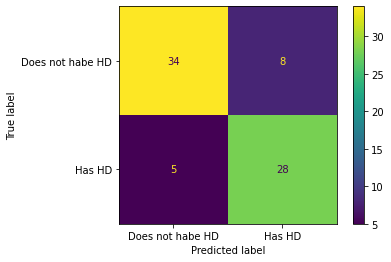

In [90]:
plot_confusion_matrix (clf_dt_pruned, X_test, y_test, 
                       display_labels=["Does not habe HD", "Has HD"])

# Verify Confusion Matrix

Now, we have 34 + 8 = 42 people that did not have heart disease, 34 (81%) are correctly classified.

This is an improvement over the full-sized tree, which only correctly classified 31 (74%) of the patient without heart disease.

We also have 5 + 28 = 33 people with heart disease, 28 (85%) are correctly classified.

This is another improvement over the full-size tree, which only correctly classified 26 (79%) of of the patients with heart disease

# Draw Prune Tree


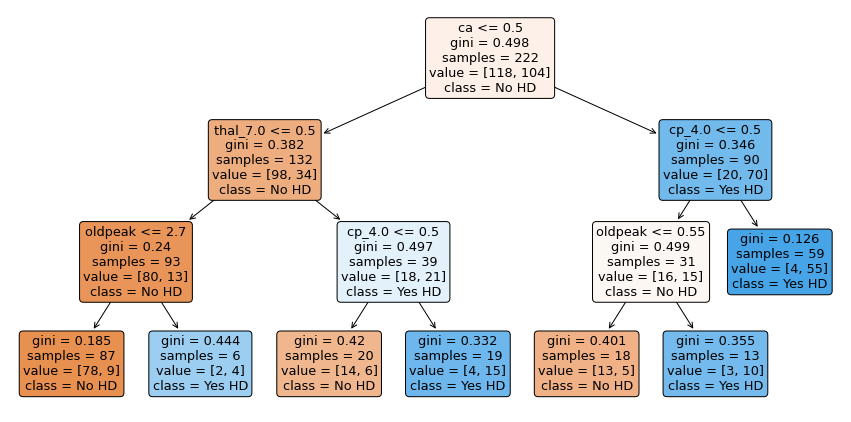

In [92]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, 
         class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns);

# Discussion

Each node contains the following information:
    
- It has column name (ca, thal, oldpeak, and etc. that shows valueless than go to the left branch 
and value great than that go to the right. 

- Each node contains gini impurity for the node. It shows the likelihood of classification.

- Each node have the number of samples in that node.

- Each node has the number of classification in that node [118, 104]. 
We have 118 people that do not have heart disease. 
We have 104 people have heart disease.

- Each node have majority of that node. 
If class = "NO HD", then node is the majority of have no heart disease in this node. 
If class ="YES HD", the majority of that class is have the heard disease in this node.

# Summary

We have discussed:

- Import Data
- Identified Missing Data
- Fixed Missing Data
- Format Data for Decision Tree by On-Hot Encoding 
- Build a Full-Sized (Preliminary) Decision Tree for Classification
- Prune Decision Tree with CCP (Cost Complexity Pruning)
- Find the Ideal Alpha for Prune Tree
- Build Final Decision Tree with Ideal Alpha
- Draw and Compare the Confusion Matrix for Prune Tree and Full-Sized Tree
- Draw and Compare the Prune Tree and Full-Sized Decision Tree